<a href="https://colab.research.google.com/github/israelklink/Financas_Descentralizadas_Python/blob/main/Simulacao_Terra_Luna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

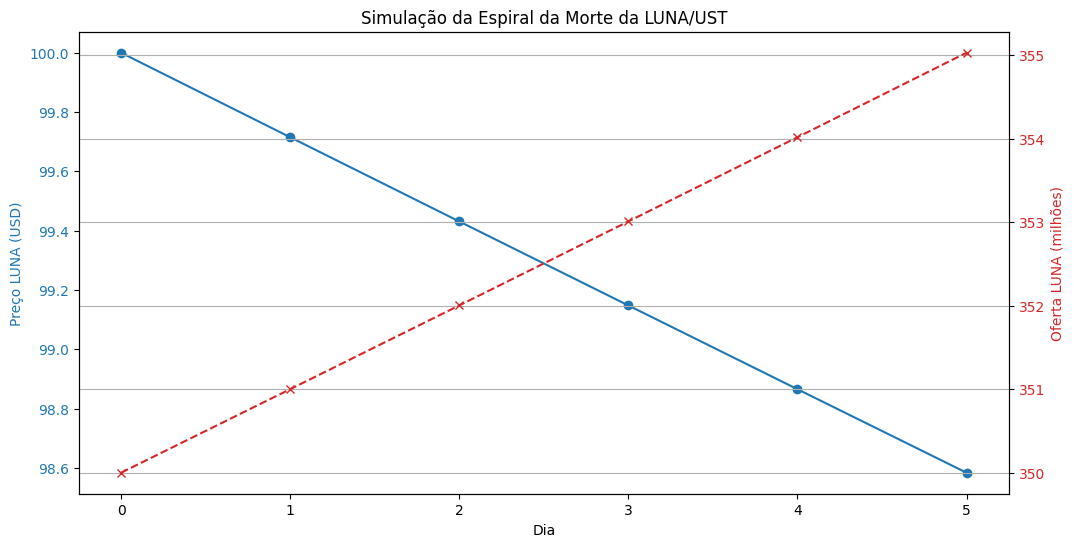

   Dia  Preço UST  Preço LUNA  Oferta LUNA (milhões)  \
0    0       1.00      100.00                 350.00   
1    1       0.98       99.72                 351.00   
2    2       0.90       99.43                 352.00   
3    3       0.70       99.15                 353.01   
4    4       0.30       98.87                 354.02   
5    5       0.10       98.58                 355.03   

   Market Cap LUNA (USD bilhões)  
0                           35.0  
1                           35.0  
2                           35.0  
3                           35.0  
4                           35.0  
5                           35.0  


In [3]:
def simular_luna_espiral(preco_ust, preco_inicial=100.0, oferta_inicial=350e6, ust_queimado_dia=100e6):

    preco_luna = [preco_inicial]
    oferta_luna = [oferta_inicial]
    market_cap = [preco_inicial * oferta_inicial]

    for i in range(1, len(preco_ust)):
        p_luna_ant = preco_luna[-1]
        oferta_ant = oferta_luna[-1]

        if preco_ust[i] < 1:
            luna_emitida = 1 / p_luna_ant
            nova_oferta = oferta_ant + ust_queimado_dia * luna_emitida
            novo_preco = p_luna_ant * (oferta_ant / nova_oferta)
        else:
            nova_oferta = oferta_ant
            novo_preco = p_luna_ant

        preco_luna.append(novo_preco)
        oferta_luna.append(nova_oferta)
        market_cap.append(novo_preco * nova_oferta)

    # Retorna dataframe com os resultados
    return pd.DataFrame({
        "Dia": range(len(preco_ust)),
        "Preço UST": preco_ust,
        "Preço LUNA": preco_luna,
        "Oferta LUNA (milhões)": [x / 1e6 for x in oferta_luna],
        "Market Cap LUNA (USD bilhões)": [x / 1e9 for x in market_cap]
    })

# ---------- Simulação ----------
precos_ust = [1.00, 0.98, 0.90, 0.70, 0.30, 0.10]
df = simular_luna_espiral(precos_ust)

# ---------- Plot ----------
fig, ax1 = plt.subplots(figsize=(12, 6))

# Preço da LUNA
ax1.set_xlabel('Dia')
ax1.set_ylabel('Preço LUNA (USD)', color='tab:blue')
ax1.plot(df['Dia'], df['Preço LUNA'], color='tab:blue', marker='o', label='Preço LUNA')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eixo secundário para oferta
ax2 = ax1.twinx()
ax2.set_ylabel('Oferta LUNA (milhões)', color='tab:red')
ax2.plot(df['Dia'], df['Oferta LUNA (milhões)'], color='tab:red', linestyle='--', marker='x', label='Oferta LUNA')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Simulação da Espiral da Morte da LUNA/UST')
plt.grid(True)

# Anotação do colapso
colapso_dia = df[df['Preço LUNA'] < 1].iloc[0]['Dia'] if any(df['Preço LUNA'] < 1) else None
if colapso_dia:
    plt.axvline(x=colapso_dia, color='gray', linestyle=':', label='Início da hiperinflação')
    plt.text(colapso_dia + 0.2, df['Preço LUNA'].max() * 0.5, 'Colapso', color='gray')

plt.show()

print(df.round(2))
